In [1]:
from videogamegen.data.dataset import VideoFrameDataset, worker_init_fn
from torch.utils.data import DataLoader

In [2]:
%ls ../gameboyprep/data/longplay_h5_files/

0_0.h5*    165_0.h5*  22_0.h5*   292_0.h5*  357_0.h5*  420_0.h5*  483_0.h5*
100_0.h5*  166_0.h5*  22_1.h5*   293_0.h5*  358_0.h5*  421_0.h5*  484_0.h5*
101_0.h5*  167_0.h5*  230_0.h5*  294_0.h5*  359_0.h5*  422_0.h5*  485_0.h5*
102_0.h5*  168_0.h5*  231_0.h5*  295_0.h5*  35_0.h5*   423_0.h5*  486_0.h5*
103_0.h5*  169_0.h5*  232_0.h5*  296_0.h5*  360_0.h5*  424_0.h5*  487_0.h5*
104_0.h5*  16_0.h5*   233_0.h5*  297_0.h5*  361_0.h5*  425_0.h5*  488_0.h5*
105_0.h5*  170_0.h5*  234_0.h5*  298_0.h5*  362_0.h5*  426_0.h5*  48_0.h5*
106_0.h5*  171_0.h5*  235_0.h5*  299_0.h5*  363_0.h5*  427_0.h5*  49_0.h5*
107_0.h5*  172_0.h5*  236_0.h5*  29_0.h5*   364_0.h5*  428_0.h5*  4_0.h5*
108_0.h5*  173_0.h5*  237_0.h5*  2_0.h5*    365_0.h5*  429_0.h5*  50_0.h5*
109_0.h5*  174_0.h5*  238_0.h5*  300_0.h5*  366_0.h5*  42_0.h5*   51_0.h5*
10_0.h5*   175_0.h5*  238_1.h5*  301_0.h5*  367_0.h5*  430_0.h5*  52_0.h5*
110_0.h5*  176_0.h5*  238_2.h5*  302_0.h5*  368_0.h5*  431_0.h5*  53_0.h5*
111_0.h5*  177_0.h5*

In [3]:
dataset = VideoFrameDataset(
    h5_dir='../gameboyprep/data/longplay_h5_files/',
    # selected_longplay_ids=[238, 247, 289] # Pokemon Green, Pokemon Blue, Pokemon Red
    # selected_longplay_ids=[0, 100, 101]
)
# dataset = VideoFrameDataset(
#     h5_dir='VideoGen/data/longplay_h5_files',
#     selected_longplay_ids=[0, 100, 101, 102, 103]
# )

In [4]:
len(dataset)

97909785

In [5]:
dataloader = DataLoader(dataset, batch_size=512, num_workers=4, shuffle=True, worker_init_fn=worker_init_fn)

In [6]:
batch = next(iter(dataloader))

Frame 49271500 timing:
  Interval lookup: 0.03ms
  H5 read: 314.56ms
  Reshape: 0.06ms
  Total: 314.65ms
Frame 45298300 timing:
  Interval lookup: 0.04ms
  H5 read: 335.87ms
  Reshape: 0.05ms
  Total: 335.97ms
Frame 82064100 timing:
  Interval lookup: 0.03ms
  H5 read: 261.32ms
  Reshape: 0.06ms
  Total: 261.41ms
Frame 46217400 timing:
  Interval lookup: 0.09ms
  H5 read: 533.00ms
  Reshape: 0.24ms
  Total: 533.32ms
Frame 22938600 timing:
  Interval lookup: 0.03ms
  H5 read: 432.41ms
  Reshape: 0.06ms
  Total: 432.51ms
Frame 14036200 timing:
  Interval lookup: 0.04ms
  H5 read: 649.66ms
  Reshape: 0.07ms
  Total: 649.77ms
Frame 13690300 timing:
  Interval lookup: 0.04ms
  H5 read: 317.29ms
  Reshape: 0.06ms
  Total: 317.40ms
Frame 77663100 timing:
  Interval lookup: 0.03ms
  H5 read: 296.82ms
  Reshape: 0.07ms
  Total: 296.92ms
Frame 53593400 timing:
  Interval lookup: 0.04ms
  H5 read: 299.96ms
  Reshape: 0.07ms
  Total: 300.08ms
Frame 24726300 timing:
  Interval lookup: 0.03ms
  H5 r

In [10]:
batch.shape

torch.Size([512, 1, 256, 256])

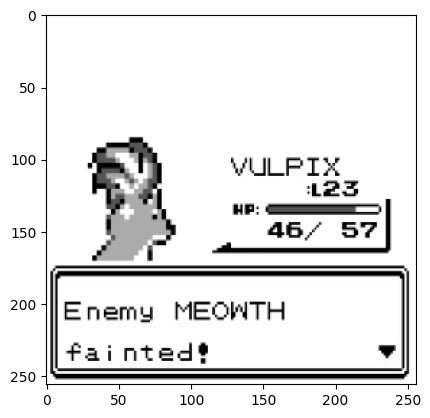

In [22]:
import matplotlib.pyplot as plt
plt.imshow(batch[246].squeeze(0), cmap='gray')

In [12]:
import h5py
def detailed_chunk_info(file_path):
    with h5py.File(file_path, 'r') as f:
        dataset = f['video_frames']
        
        print("Dataset properties:")
        print(f"- Chunks enabled: {dataset.chunks is not None}")
        print(f"- Chunk shape: {dataset.chunks}")
        print(f"- Compression: {dataset.compression}")
        print(f"- Compression opts: {dataset.compression_opts}")

In [13]:
detailed_chunk_info('../gameboyprep/data/longplay_h5_files/238_0.h5')

Dataset properties:
- Chunks enabled: True
- Chunk shape: (1, 256, 256, 1)
- Compression: gzip
- Compression opts: 4


In [ ]:
detailed_chunk_info()